In [12]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import *
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# %matplotlib widget
%matplotlib inline

In [2]:
svec = loadtxt("../Data/3x3-0p/cell")
rvec = svec/3

n_nb=loadtxt("../Data/3x3-0p/nb")
n_se=loadtxt("../Data/3x3-0p/se")
m_nb=loadtxt("../Data/3x3-0p-p2/nb")
m_se=loadtxt("../Data/3x3-0p-p2/se")



nb=array([n_nb,m_nb])
nb[0] = dot(nb[0],svec)
nb[1] = dot(nb[1],svec)

se=array([n_se,m_se])
se[0] = dot(se[0],svec)
se[1] = dot(se[1],svec)

se[0] = se[0]-(nb[0][0]-nb[1][0])
nb[0] = nb[0]-(nb[0][0]-nb[1][0])

nb_x, nb_y, nb_z = nb.T[0].T, nb.T[1].T, nb.T[2].T
se_x, se_y, se_z = se.T[0].T, se.T[1].T, se.T[2].T


b = 4*pi/(linalg.norm(rvec[0])*sqrt(3))
qvec = b*array([[-sqrt(3)/2,-1/2,0],[0,1,0],[sqrt(3)/2,-1/2,0]])/3
qdif = array([[qvec[0]-qvec[1],qvec[1]-qvec[2],qvec[2]-qvec[0]]])
qdif= qdif[0]
qunit = qvec/abs(linalg.norm(qvec[0]))


# u=u-mean(u,axis=0)
# u = u-sum(u,axis=0)

u = nb[1]-nb[0]
# u_se = se[1]-se[0]
# u_se = u_se- average(u,axis=0)

u = u- average(u,axis=0)




In [7]:
def plot_lattice():
    fig = plt.figure(figsize=(10,10))
    s1, s2 = 200,300
    hw=0.2
    cell_color="black"
    cell_lw=4
    cell_zorder=0
    plt.scatter(nb_x[0],nb_y[0],c="blue",s=s2,label="Nb")
    plt.scatter(se_x[0],se_y[0],c="green",s=s1,label="Se")    
    period = arange(-2,3,1)
    for i in period:
        for j in period:
            plt.scatter(nb_x[0]+(i*svec[0][0]+j*svec[1][0]),nb_y[0]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(se_x[0]+(i*svec[0][0]+j*svec[1][0]),se_y[0]+(i*svec[0][1]+j*svec[1][1]),c="green",s=s1,zorder=2)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            for k in [0,6,8]:
                plt.arrow(nb[0][k][0]+(i*svec[0][0]+j*svec[1][0]),nb[0][k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
            for k in [3,4,7]:
                plt.arrow(nb[0][k][0]+(i*svec[0][0]+j*svec[1][0]),nb[0][k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="red",head_width=hw)   
            for k in [1,2,5]:
                plt.arrow(nb[0][k][0]+(i*svec[0][0]+j*svec[1][0]),nb[0][k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
    plt.xlim(-12,12)
    plt.ylim(-12,12)
    plt.xticks([])
    plt.yticks([])
#     plt.axis("equal")
    plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)
#     plt.savefig("3x3_lattice_c3.pdf",bbox_inches='tight')
    # plt.axis("equal")
#     plt.show()

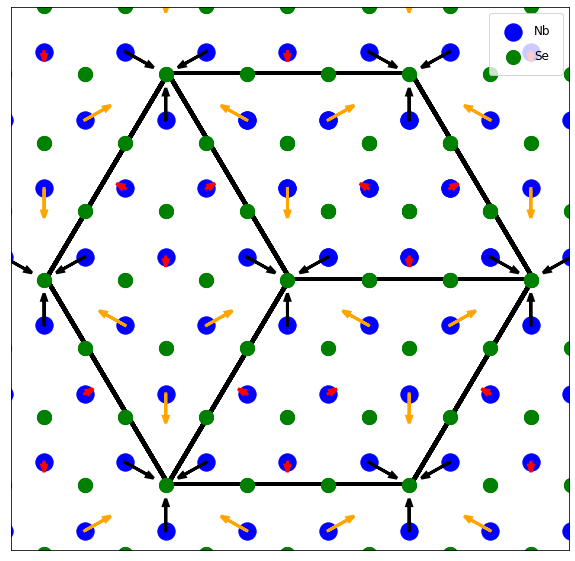

In [8]:
plot_lattice()

In [9]:
sum(u,axis=0)

array([-5.55111512e-17, -2.77555756e-17,  1.05879118e-22])

In [13]:
for i in u:
    print(norm(i))

0.11087205015755427
0.09930445863513349
0.09955504038423157
0.012982618277828269
0.013287486790753584
0.09946634655662849
0.11085625071859562
0.013164515998356989
0.11077921214502866


In [14]:
u

array([[-9.61288715e-02, -5.52435659e-02, -1.20644547e-07],
       [-8.60799157e-02,  4.95138729e-02, -2.79121990e-08],
       [ 7.41190885e-05, -9.95550128e-02, -9.13836813e-08],
       [-2.66675595e-05, -1.29825909e-02,  5.00863864e-08],
       [-1.15095513e-02,  6.63984433e-03,  5.00764845e-07],
       [ 8.62568775e-02,  4.95308508e-02, -5.47632182e-09],
       [ 9.60861568e-02, -5.52861537e-02, -8.23699884e-09],
       [ 1.13884802e-02,  6.60355958e-03, -1.08773753e-07],
       [-6.06275375e-05,  1.10779196e-01, -1.88423730e-07]])

In [16]:
def uToQ(supercell,q,disp):
    return dot(exp(-1j*dot(supercell,q.T)).T,u)

In [18]:
utilde = uToQ(nb[0],qvec,u)

In [19]:
for i in utilde:
    print(norm(i))

0.31724893504646756
0.3163754175795813
0.31767338818694285


In [38]:
sum(exp(-1j*dot(concatenate([nb[0],se[0]]),qvec)))

(29.878892704951273-0.8059124706067364j)

In [20]:
linalg.norm(qvec[0])/linalg.norm(utilde[2])

2.181748507880849

In [21]:
for i in real(utilde):
    print(norm(i))

0.04684166057088703
0.010778459983939188
0.010188365420319022


In [22]:
for i in imag(utilde):
    print(norm(i))

0.3137718050161289
0.31619176088100254
0.3175099664140232


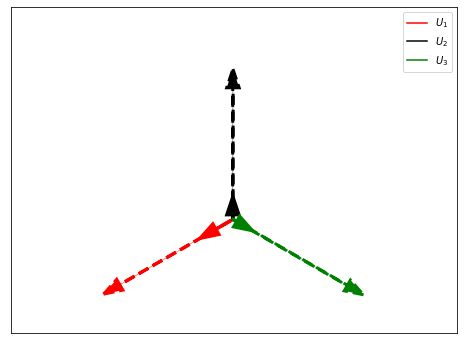

In [24]:
fig = plt.figure(figsize=(8,6))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green"]
    
for i in range(3):
    plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.03,color=colors[i],ls="-",lw=3)
    plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.03,color=colors[i],ls="--",lw=3)
    plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))
    
# for i in real(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="black")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)
    
# for i in imag(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="red")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)


# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.axis("equal")    
plt.show()

In [ ]:
sum(se[1]-se[0],axis=0)